In [2]:
from transformers import AutoModel, pipeline

In [8]:
from transformers import pipeline

text = [
    "Brevity is the soul of wit.",
    "Amor, ch'a nullo amato amar perdona.",
    "السلام عليكم",
    "التّعلم"
]

model_ckpt = "papluca/xlm-roberta-base-language-detection"
pipe = pipeline("text-classification", model=model_ckpt)
pipe(text, top_k=1, truncation=True)


[[{'label': 'en', 'score': 0.8889274001121521}],
 [{'label': 'it', 'score': 0.9120113253593445}],
 [{'label': 'ar', 'score': 0.9071348309516907}],
 [{'label': 'ar', 'score': 0.9722012281417847}]]

In [29]:
from huggingface_hub import notebook_login

notebook_login()

In [25]:
from huggingface_hub import upload_file


upload_file(path_or_fileobj='Hamza Naser.pdf',
            path_in_repo='Hamza.pdf',
            repo_id='HamzaNaser/dummy',
            create_pr=1,
            token='#############')

CommitInfo(commit_url='https://huggingface.co/HamzaNaser/dummy/commit/8919c33ff0b28913e28acd07954431bd2c0dbd8c', commit_message='Upload Hamza.pdf with huggingface_hub', commit_description='', oid='8919c33ff0b28913e28acd07954431bd2c0dbd8c', pr_url='https://huggingface.co/HamzaNaser/dummy/discussions/2', pr_revision='refs/pr/2', pr_num=2)

In [30]:
from huggingface_hub import delete_file

delete_file('Hamza.pdf',repo_id='HamzaNaser/dummy',token='##############')

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-66a3650a-5626a22468c5d2b94f5c7d79;8a7bcdc4-a619-4365-9392-510291ba8066)

Entry Not Found for url: https://huggingface.co/api/models/HamzaNaser/dummy/commit/main.
A file with the name "Hamza.pdf" does not exist

In [45]:
from huggingface_hub import Repository

!rm -r folder
repo = Repository('folder',clone_from='HamzaNaser/dummy')
repo.git_pull()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/HamzaNaser/dummy into local empty directory.


In [52]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')



model.save_pretrained(repo.local_dir)
tokenizer.save_pretrained(repo.local_dir)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


('/content/folder/tokenizer_config.json',
 '/content/folder/special_tokens_map.json',
 '/content/folder/vocab.txt',
 '/content/folder/added_tokens.json',
 '/content/folder/tokenizer.json')

In [55]:
repo.git_add('.')
repo.git_commit('hello')
repo.git_push()

Upload file model.safetensors:   0%|          | 1.00/413M [00:00<?, ?B/s]

To https://huggingface.co/HamzaNaser/dummy
   a0c9d30..dc7eb6b  main -> main

   a0c9d30..dc7eb6b  main -> main



'https://huggingface.co/HamzaNaser/dummy/commit/dc7eb6b92b29d6b8dc27d09e39fa151a6078d4c9'

In [56]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="HamzaNaser/dummy")

config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [61]:
pipe('hello my name is hamza')

[{'label': 'LABEL_0', 'score': 0.6051969528198242}]

Push to hub while training

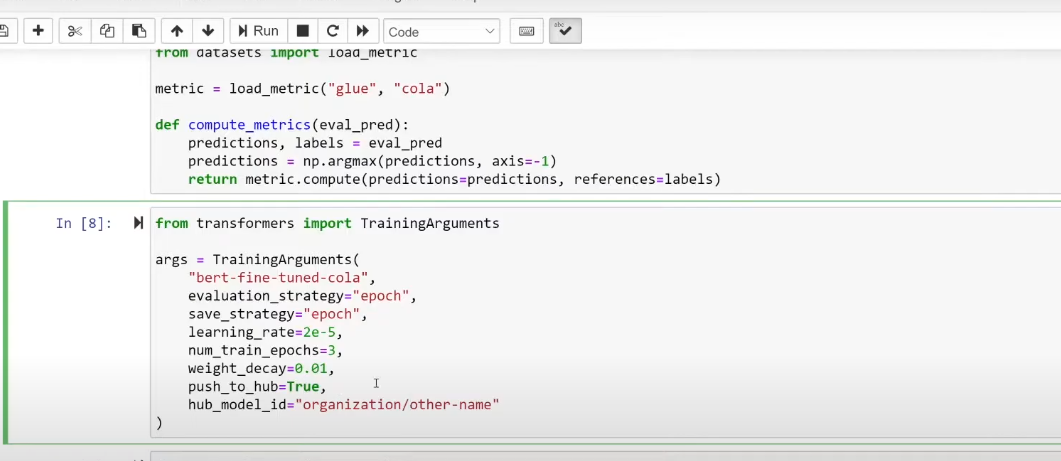

In [70]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires

In [1]:
from datasets import load_dataset

In [20]:
from transformers import Trainer,TrainingArguments, AutoModelForSequenceClassification,AutoTokenizer




args = TrainingArguments('test-trainer',
                         push_to_hub = True,
                         push_to_hub_model_id='dummy')

model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

data = load_dataset('glue','mrpc')


# Correct ids and labels
model.config.id2label = {
    0: 'Correct',
    1: 'Incorrect'
}

model.config.label2id = {
    'Correct': 0,
    'Incorrect': 1
}

trainer = Trainer(model,args=args)




/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1980: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case HamzaNaser/dummy).
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
trainer.push_to_hub('end training')

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/HamzaNaser/dummy/commit/7fcaf3735488b1589c5ecf60d9adf890f1c9b383', commit_message='end training', commit_description='', oid='7fcaf3735488b1589c5ecf60d9adf890f1c9b383', pr_url=None, pr_revision=None, pr_num=None)

In [25]:
# change ids and labels
model.config.id2label = {
    0: 'Potato',
    1: 'Tomatos'
}

model.config.label2id = {
    'Potato': 0,
    'Tomatos': 1
}

# Only pushing up the config file
model.config.push_to_hub('HamzaNaser/dummy')

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/HamzaNaser/dummy/commit/ef2bff983c3ff8289cef7350b7273304f9c4676c', commit_message='Upload config', commit_description='', oid='ef2bff983c3ff8289cef7350b7273304f9c4676c', pr_url=None, pr_revision=None, pr_num=None)

In [26]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="HamzaNaser/dummy")
pipe('hello sopdfjpdsojf')

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

[{'label': 'Tomatos', 'score': 0.5483448505401611}]

In [27]:
tokenizer.push_to_hub('HamzaNaser/mytoken')

CommitInfo(commit_url='https://huggingface.co/HamzaNaser/mytoken/commit/74f71f4af3ed8770ac4bed8c702d43876affdd81', commit_message='Upload tokenizer', commit_description='', oid='74f71f4af3ed8770ac4bed8c702d43876affdd81', pr_url=None, pr_revision=None, pr_num=None)